In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, ensemble
import random
%matplotlib inline

###Lecture3_Exercises

**Economics dataset analysis**

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values are the Series from each downloaded file
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following

1. dropping the rows with null values
2. Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary

**The codes and their corresponding series representation**

                            Series                   Code           Frequency
                            Real GDP                 GDPC1          Quarterly
                            Industrial Production   INDPRO          Quarterly
                            Core CPI               CPILFESL         Monthly
                            Unemployment Rate       UNRATE          Monthly
                            10 Year Yield            GS10           Monthly
                            1 Year Yield             GS1            Monthly
                            Baa Yield                BAA            Monthly
                            Aaa Yield                AAA            Monthly
                            
** Variable Description **

                            Series                        Description
                            Treated                       Dummy indicating whether the candidate received the treatment
                            Age                           Age in years
                            Education (years)             Years of Education
                            Black                         Dummy indicating African-American
                            Hispanic                      Dummy indicating Hispanic
                            Married                       Dummy indicating married
                            Real income Before ($)        Income before program
                        Real income After ($)         Income after program           


In [38]:
try:
    del merged_data
except:
    pass
docs=['AAA','BAA','CPILFESL','GDPC1','GS1','GS10','INDPRO','UNRATE']
for doc in docs:
    data=open(r'/home/sadat/Documents/DSE/ssnazrul/DSE200/data/economics/'+doc+'.csv','r')
    df=pd.read_csv(data)
    df.rename(columns={'VALUE':doc}, inplace=True)
    try:
        merged_data=pd.merge(merged_data,df,how='outer', on="DATE")
    except:
        merged_data=df
    data.close()
merged_data.set_index('DATE', inplace=True)
merged_data.head()

,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE
DATE,,,,,,,,
1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN
1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN
1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN
1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN
1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN


In [72]:
term_premium=pd.Series(merged_data['GS10']-merged_data['GS1'], name='TERM PREMIUM')
default_premium=pd.Series(merged_data['AAA']-merged_data['BAA'], name='DEFAULT PREMIUM')

premium=pd.concat([term_premium,default_premium],axis=1).reset_index()

premium.head()

,DATE,TERM PREMIUM,DEFAULT PREMIUM
0,1919-01-01,NaN,-1.77
1,1919-02-01,NaN,-1.85
2,1919-03-01,NaN,-1.76
3,1919-04-01,NaN,-1.79
4,1919-05-01,NaN,-1.70


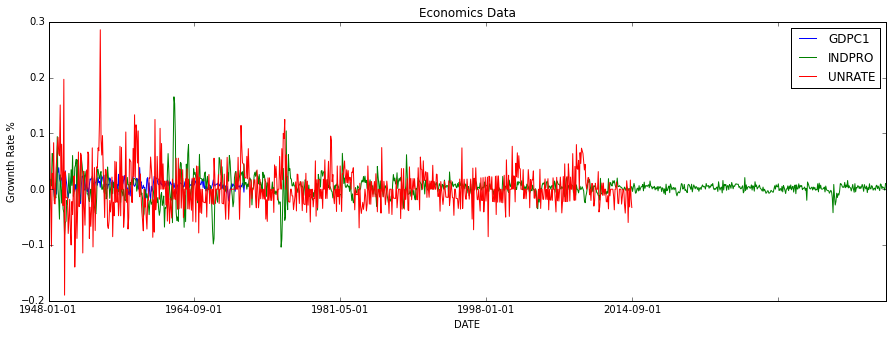

In [79]:
GDP=merged_data['GDPC1'].dropna().pct_change()
IP=merged_data['INDPRO'].dropna().pct_change()
Unemp=merged_data['UNRATE'].dropna().pct_change()

f=plt.figure(figsize=(15,5))
GDP.plot()
IP.plot()
Unemp.plot()
plt.legend(['GDPC1','INDPRO','UNRATE'])
plt.title('Economics Data')
plt.xlabel('DATE')
plt.ylabel(r'Grownth Rate %')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd24985990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbd245c93d0>]], dtype=object)

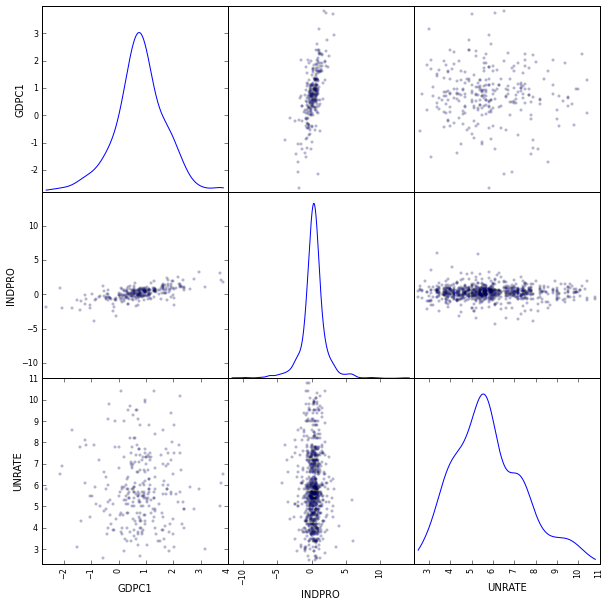

In [48]:
from pandas.tools.plotting import scatter_matrix

Econ=pd.concat([GDP, IP, Unemp],axis=1).reset_index()
scatter_matrix(Econ, alpha=0.2, figsize=(10,10), diagonal='kde')

**Nutrition dataset analysis**

Download the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

> import json
> db = json.load(open('foods-2011-10-03.json'))

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

nuts = nuts.drop_duplicates()

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). 

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.

Using the foods DataFrame you have been building, compute the following things:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

In [4]:
#!wget https://github.com/pydata/pydata-book/blob/master/ch07/foods-2011-10-03.json?raw=true

In [90]:
import json 

try:
    del meta_data
except:
    pass
db = json.load(open('foods-2011-10-03.json'))
for dictionary in db:
    df=pd.DataFrame({'#':[0]})
    df['description']=dictionary['description']
    df['group']=dictionary['group']
    df['id']=dictionary['id']
    df['manufacturer']=dictionary['manufacturer']
    del df['#']
    try:
        meta_data=pd.merge(meta_data,df, how='outer')
    except:
        meta_data=df
meta_data.set_index('id', inplace=True)
meta_data.drop_duplicates()

meta_data.head()

,description,group,manufacturer
id,,,
1008,"Cheese, caraway",Dairy and Egg Products,
1009,"Cheese, cheddar",Dairy and Egg Products,
1018,"Cheese, edam",Dairy and Egg Products,
1019,"Cheese, feta",Dairy and Egg Products,
1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,


In [104]:
food=pd.DataFrame(db)
food.set_index('id', inplace=True)
food['nutrients'][1008]

[{u'description': u'Protein',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 25.18},
 {u'description': u'Total lipid (fat)',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 29.2},
 {u'description': u'Carbohydrate, by difference',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 3.06},
 {u'description': u'Ash', u'group': u'Other', u'units': u'g', u'value': 3.28},
 {u'description': u'Energy',
  u'group': u'Energy',
  u'units': u'kcal',
  u'value': 376.0},
 {u'description': u'Water',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 39.28},
 {u'description': u'Energy',
  u'group': u'Energy',
  u'units': u'kJ',
  u'value': 1573.0},
 {u'description': u'Fiber, total dietary',
  u'group': u'Composition',
  u'units': u'g',
  u'value': 0.0},
 {u'description': u'Calcium, Ca',
  u'group': u'Elements',
  u'units': u'mg',
  u'value': 673.0},
 {u'description': u'Iron, Fe',
  u'group': u'Elements',
  u'units': u'mg',
  u'value': 0.64},
 {u'description': u'Magnesi

**Classifying Digits**
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [56]:
from sklearn.datasets import load_digits
digits = load_digits()

And the images can be visualized as follows

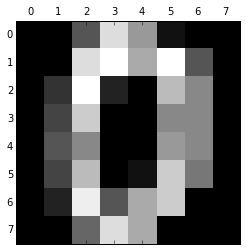

In [57]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

1. Visualize the first 15 digits to get a better understanding of the data
2. With x as data and y as target, classify the above datasets into individual targets using a decision tree
3. Perform this classification task with sklearn.svm.SVC. How does the choice of kernel affect the results?
4. Perform this classification task with sklearn.ensemble.RandomForestClassifier. Write in the markdown below the impact each of the parammeter had on the result



        1. max_depth: 
        2. max_features:
        3. n_estimators:



Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on your results. Output the best F1 score that you achieve. 



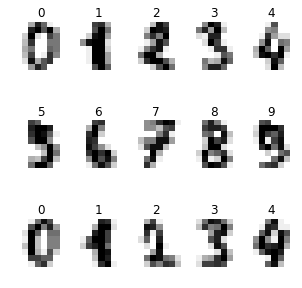

In [160]:
#1. Visualize the first 15 digits to get a better understanding of the data

images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [180]:
#2 With x as data and y as target, classify the above datasets into individual targets using a decision tree

#Define variables
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
y = digits.target

#Create random indices
sample_index=random.sample(range(len(x)),len(x)/2)
valid_index=[i for i in range(len(x)) if i not in sample_index]

#Sample and validation images
sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]

#Sample and validation targets
sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

#Using the Random Tree Classifier
classifier = ensemble.RandomForestClassifier()

#Fit model with sample data
classifier.fit(sample_images, sample_target)

#Attempt to predict validation data
score=classifier.score(valid_images, valid_target)
print 'Score\t'+str(score)

Score	0.93659621802


In [181]:
#3 Perform this classification task with sklearn.svm.SVC. How does the choice of kernel affect the results?

kernels=['linear','poly','rbf','sigmoid']
for k in kernels:
    #Create random indices
    sample_index=random.sample(range(len(x)),len(x)/2)
    valid_index=[i for i in range(len(x)) if i not in sample_index]

    #Sample and validation images
    sample_images=[x[i] for i in sample_index]
    valid_images=[x[i] for i in valid_index]

    #Sample and validation targets
    sample_target=[y[i] for i in sample_index]
    valid_target=[y[i] for i in valid_index]
    
    #Use SVC classifier with selected kernel
    classifier = svm.SVC(gamma=0.001, kernel=k)
    
    #Fit model with sample data
    classifier.fit(sample_images, sample_target)

    #Attempt to predict validation data
    score=classifier.score(valid_images, valid_target)
    
    print k+'\t'+str(score)

linear	0.971078976641
poly	0.986651835373
rbf	0.988876529477
sigmoid	0.612903225806
